In [ ]:
!pip install pmdarima
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np


In [ ]:

data = pd.read_csv('SBIN.NS.csv')

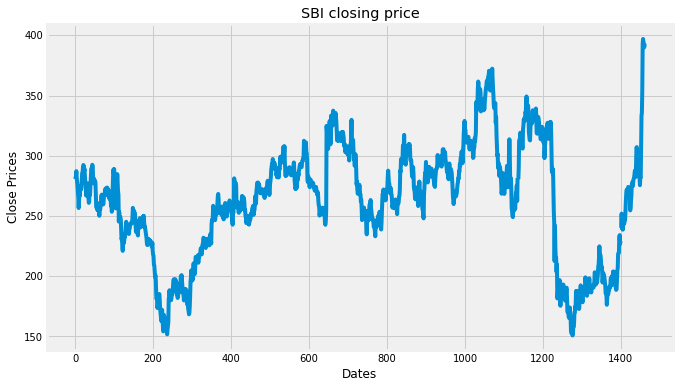

In [ ]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('SBI closing price')
plt.show()

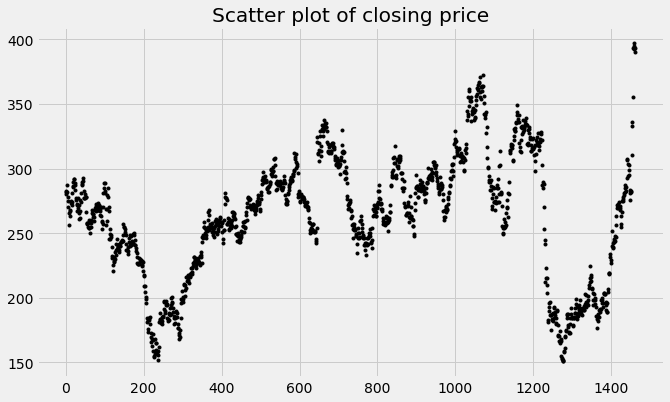

In [ ]:
df_close = data['Close']
df_close.dropna()
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

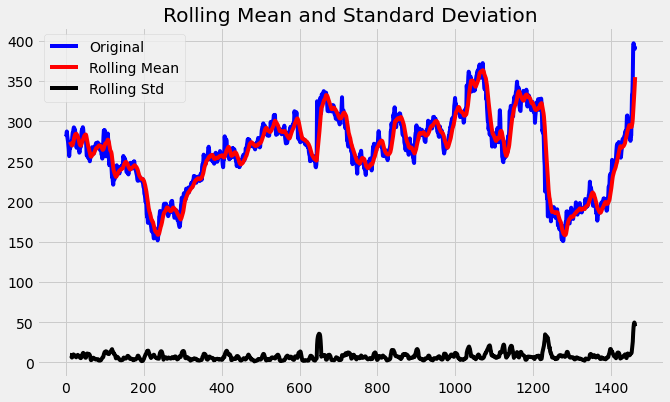

Results of dickey fuller test
Test Statistics                  -2.036841
p-value                           0.270657
No. of lags used                  7.000000
Number of observations used    1454.000000
critical value (1%)              -3.434855
critical value (5%)              -2.863530
critical value (10%)             -2.567829
dtype: float64


In [ ]:
#Test for staionarity
df_close = df_close.fillna(method='ffill')
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

<Figure size 720x432 with 0 Axes>

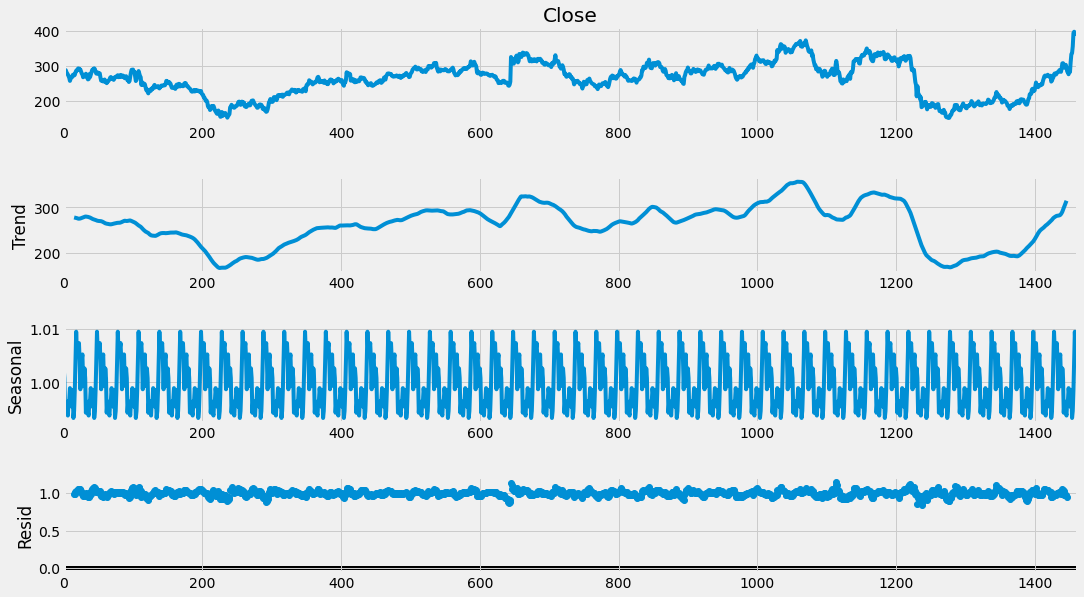

In [ ]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


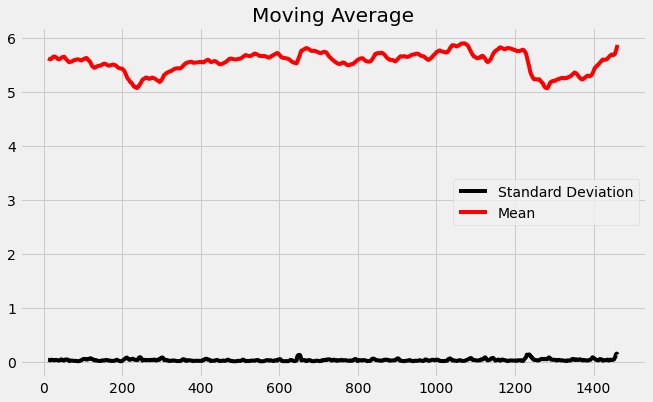

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

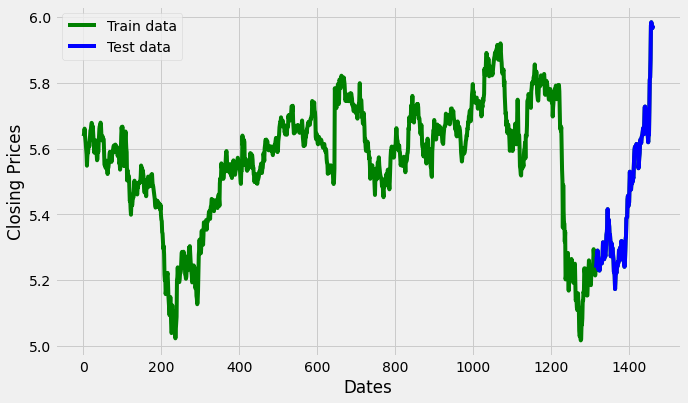

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

No handles with labels found to put in legend.


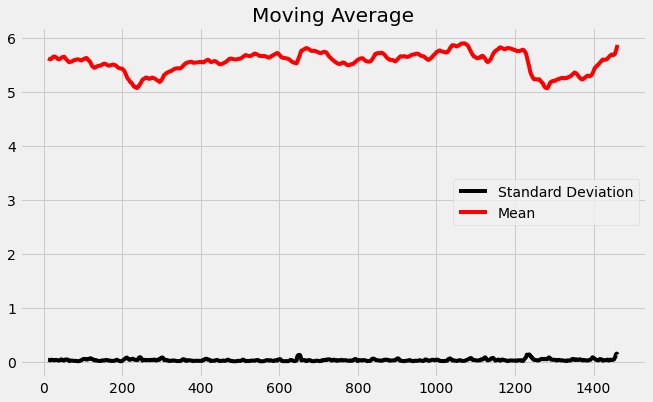

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6128.834, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6126.971, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6126.962, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6130.570, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6124.939, Time=0.81 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.421 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1312
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3066.285
Date:                Sun, 14 Feb 2021   AIC                          -6130.570
Time:                        06:26:07   BIC                          -6125.392
Sample:                             0   HQIC                         -6128.628
                               - 1312                                  

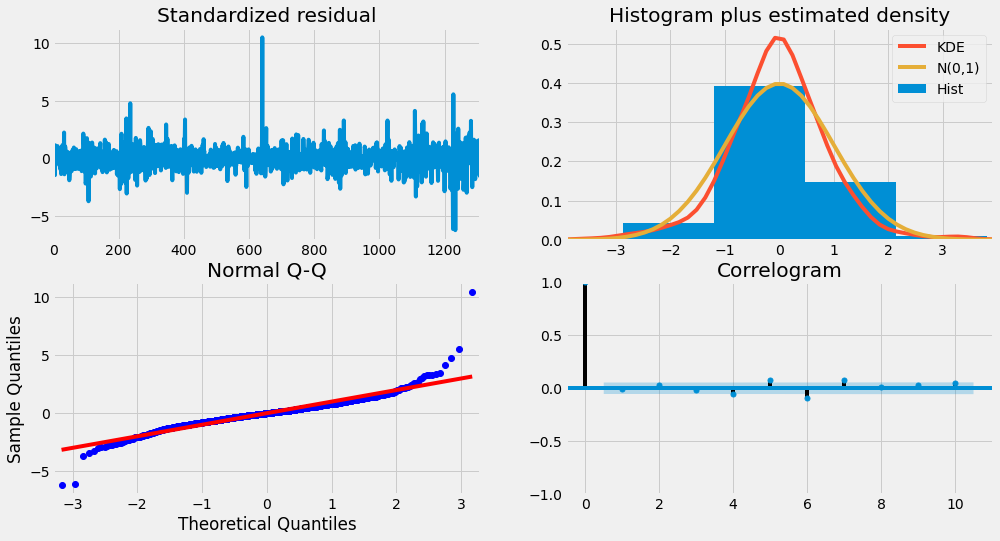

In [ ]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


In [ ]:
model = ARIMA(train_data, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1311
Model:                 ARIMA(3, 1, 2)   Log Likelihood                3083.698
Method:                       css-mle   S.D. of innovations              0.023
Date:                Sun, 14 Feb 2021   AIC                          -6153.396
Time:                        06:26:17   BIC                          -6117.146
Sample:                             1   HQIC                         -6139.800
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0003      0.001     -0.500      0.617      -0.002       0.001
ar.L1.D.Close    -1.5660      0.095    -16.427      0.000      -1.753      -1.379
ar.L2.D.Close    -0.7407      0.101     

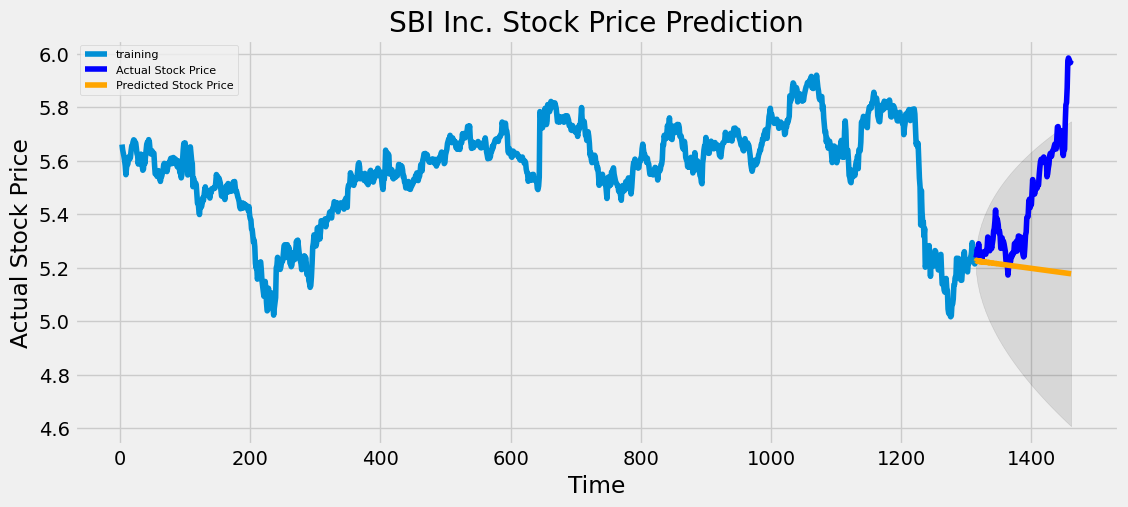

In [ ]:
# Forecast
fc, se, conf = fitted.forecast(147, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('SBI Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.10399145110358612
MAE: 0.24135431501491333
RMSE: 0.32247705515832614
MAPE: 0.042991586186204425


In [ ]:
print(100-mape*100)

95.70084402913497


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

dataset_train = pd.read_csv('SBIN.NS (1).csv')
dataset_train = dataset_train.dropna()
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
dataset_train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1467,2020-12-23,256.950012,263.899994,255.600006,263.000000,263.000000,29056404.0
1468,2020-12-24,265.000000,268.850006,264.649994,266.850006,266.850006,28585509.0
1469,2020-12-28,268.750000,276.000000,268.000000,275.200012,275.200012,36870242.0
1470,2020-12-29,276.299988,279.899994,274.700012,277.899994,277.899994,45032526.0
1471,2020-12-30,278.000000,278.700012,272.500000,276.899994,276.899994,30971894.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, 1469):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras import optimizers

In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
optimizer = optimizers.Adam(clipvalue=0.5)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
45/45 [==============================] - 10s 100ms/step - loss: 0.0753
Epoch 2/100
45/45 [==============================] - 5s 110ms/step - loss: 0.0133
Epoch 3/100
45/45 [==============================] - 5s 111ms/step - loss: 0.0107
Epoch 4/100
45/45 [==============================] - 5s 109ms/step - loss: 0.0091
Epoch 5/100
45/45 [==============================] - 5s 110ms/step - loss: 0.0085
Epoch 6/100
45/45 [==============================] - 5s 106ms/step - loss: 0.0091
Epoch 7/100
45/45 [==============================] - 5s 108ms/step - loss: 0.0074
Epoch 8/100
45/45 [==============================] - 5s 106ms/step - loss: 0.0068
Epoch 9/100
45/45 [==============================] - 5s 104ms/step - loss: 0.0089
Epoch 10/100
45/45 [==============================] - 5s 105ms/step - loss: 0.0068
Epoch 11/100
45/45 [==============================] - 5s 106ms/step - loss: 0.0067
Epoch 12/100
45/45 [==============================] - 5s 105ms/step - loss: 0.0063
Epoch 13/100

In [ ]:
dataset_test = pd.read_csv('SBIN.NS (2).csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 90):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

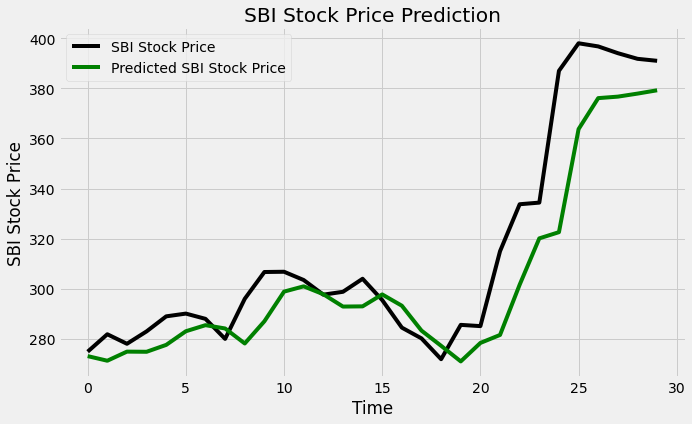

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(predicted_stock_price, real_stock_price)
print('MSE: '+str(mse))
mae = mean_absolute_error(predicted_stock_price, real_stock_price)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(predicted_stock_price, real_stock_price))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(real_stock_price - predicted_stock_price)/np.abs(predicted_stock_price))
print('MAPE: '+str(mape))
print(100-mape*100)

MSE: 347.7359518906621
MAE: 13.220136536002602
RMSE: 18.647679530994253
MAPE: 0.042648393811401224
95.73516061885988


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("SBIN.NS.csv")
df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-03-13,290.000000,291.049988,280.000000,280.750000,271.203003,13414248.0
1,2015-03-16,281.500000,283.850006,280.000000,281.649994,272.072418,15132928.0
2,2015-03-17,283.899994,284.000000,279.500000,283.100006,273.473083,11350496.0
3,2015-03-18,284.100006,288.450012,282.000000,287.299988,277.530243,12394230.0
4,2015-03-19,290.000000,290.299988,280.600006,281.600006,272.024109,11046649.0


Text(0.5, 1.0, 'SBI Autocorrelation plot')

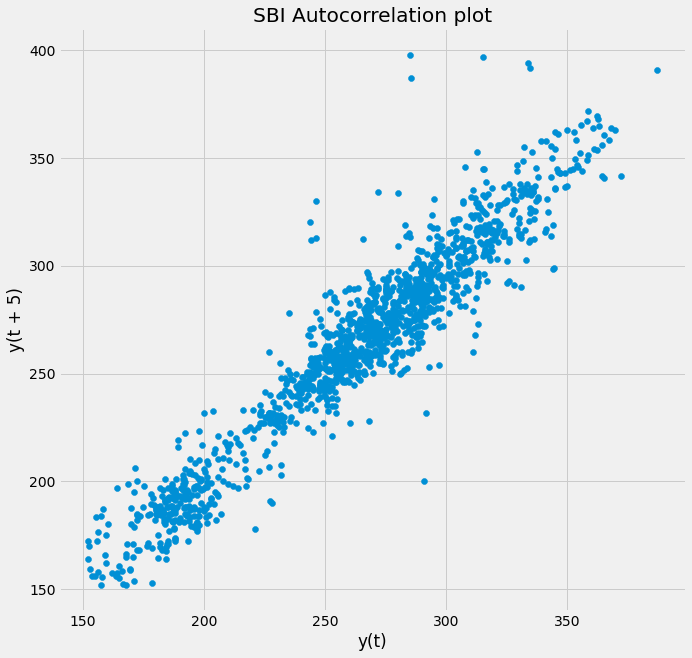

In [ ]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5
         )
plt.title('SBI Autocorrelation plot')

TypeError: ignored

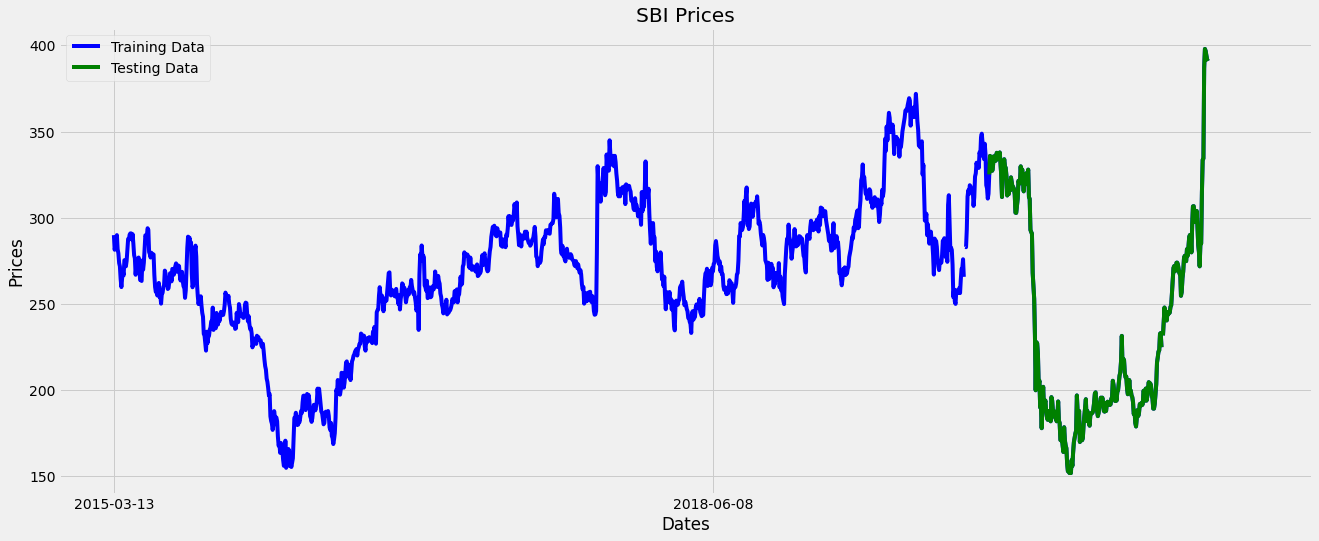

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
train_data.dropna()
test_data.dropna()
plt.figure(figsize=(20,8))
plt.title('SBI Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,2000, 800), df['Date'][0:2000:800])
plt.legend()

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +       np.abs(y_true))))

In [ ]:
train_ar = train_data['Open'].values
train_ar = np.nan_to_num(train_ar)
test_ar = test_data['Open'].values
test_ar = np.nan_to_num(test_ar)
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)




<class 'list'>
Testing Mean Squared Error: 360.170
Symmetric mean absolute percentage error: 27.611


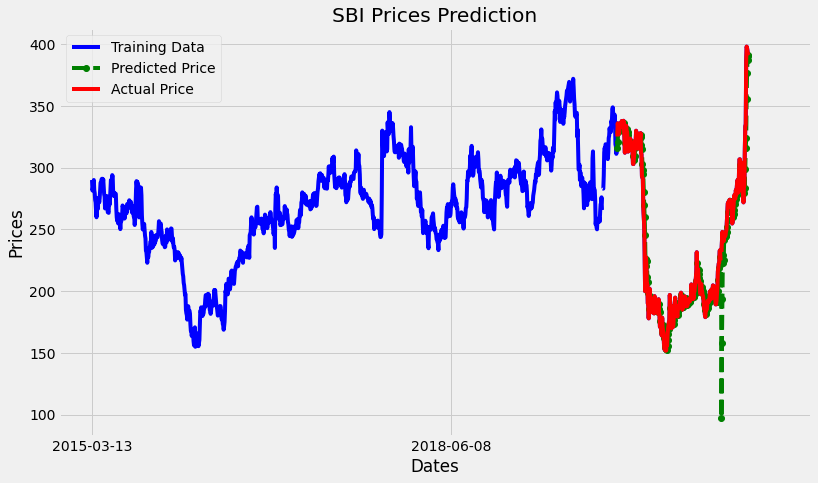

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('SBI Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,2000, 800), df['Date'][0:2000:800])
plt.legend()

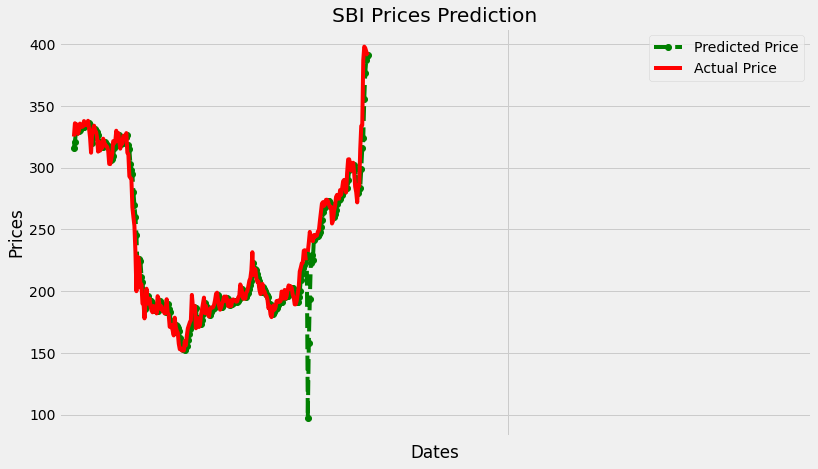

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.legend()
plt.title('SBI Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(1600,2000, 300), df['Date'][1600:2000:300])
plt.legend()